# Human's Similar Work And Rest Schedules And Different Local Temperatures in Seattle And San Francisco Helped To Shape The Similarities And Differences In The Hourly Trend of The Crime Rates In 2014 Summer
# Y.Zhang
# July 9, 2017

This work compared the hourly trends of the crime rates in Seattle (SEA) and San Francisco (SFO) in 2014 Summer. It was found that the mean hourly crime rates in SEA and SFO consistently varied similarly from 12am to around 7pm, and varied differently after 7pm. Among the many possible causes which could lead to the observed trends, this work discussed the impact of people's work and rest schedules and the local temperatures. The work is done for an assignment from the Coursera course--"Communicating Data Science Results" by University of Washington. The crime data used for analysis was downloaded from the Github repository of the course, and the temperature data was retrieved to help explain the hourly crime trend from http://www.wunderground.com using a separate R code.

At first, raw data was loaded into the working directory and was prepared for further processings like merging and binding. One important preparation was to make the data from SEA and SFO have the same schema, for example, the same time format and the same definitions of crime categories.

In [37]:
library(dplyr)
library(plyr)
library(ggplot2)

## Working directory
setwd("C:\\tutu\\job and internship\\data scientists\\coursera\\datascienceatscale\\course3-communicating data science\\week1\\assignment1\\codes")

## 2014 summer crime data in SEA and SFO from the Coursera repository
dfseaCrime=read.csv("..\\data\\seattle_incidents_summer_2014.csv",sep=",",header=TRUE,na.strings=c("NA",""),stringsAsFactors=FALSE)
dfsfoCrime=read.csv("..\\data\\sanfrancisco_incidents_summer_2014.csv",sep=",",header=TRUE,na.strings=c("NA",""),stringsAsFactors=FALSE)
dfseaCrime$city<-"SEA"
dfsfoCrime$city<-"SFO"

## 2014 summer temperature data in SEA and SFO retrieved from http://www.wunderground.com
dfseaTemp<-read.csv(".\\KBFI-2014summer.csv",header=TRUE, sep=",",na.strings=c(" ","NA"), stringsAsFactors=FALSE)
dfseaTemp$city<-"SEA"
dfsfoTemp<-read.csv(".\\KSFO-2014summer.csv",header=TRUE, sep=",",na.strings=c(" ","NA"), stringsAsFactors=FALSE)
dfsfoTemp$city<-"SFO"


## Basic information of the crime data 
#names(dfseaCrime)
#dim(dfseaCrime)
#head(dfseaCrime,2)
#names(dfsfoCrime)
#dim(dfsfoCrime)
#tail(dfsfoCrime,2)

## Basic information of the temperature data
#names(dfseaTemp)
#dim(dfseaTemp)
#head(dfseaTemp,2)
#names(dfsfoTemp)
#dim(dfsfoTemp)
#tail(dfsfoTemp,2)

## Remove duplicates if there are any
dfseaCrime<-unique(dfseaCrime)
dfsfoCrime<-unique(dfsfoCrime)
dfseaTemp<-unique(dfseaTemp)
dfsfoTemp<-unique(dfsfoTemp)

# Remove rows with NA for Date and Time
dfseaCrime<-dfseaCrime[complete.cases(dfseaCrime[,"Occurred.Date.or.Date.Range.Start"]),]
dfsfoCrime<-dfsfoCrime[complete.cases(dfsfoCrime[,5:6]),]

dfseaTemp<-na.omit(dfseaTemp)
dfsfoTemp<-na.omit(dfsfoTemp)

## Format time-related columns for SEA crime data
dfsea_crimeTime<-strptime(dfseaCrime$Occurred.Date.or.Date.Range.Start,format="%m/%d/%Y %I:%M:%S %p")
dfseaCrime$Date<-strftime(dfsea_crimeTime,format="%m/%d/%Y")
dfseaCrime$Time<-strftime(dfsea_crimeTime,format="%H")
dfseaCrime$DayofWeek<-strftime(dfsea_crimeTime,format="%A")
dfseaCrime$month<-strftime(dfsea_crimeTime,format="%b")
dfseaCrime$DayofMonth<-strftime(dfsea_crimeTime,format="%e")

## Format time-related columns for SFO crime data
dfsfo_crimeTime<-strptime(paste(dfsfoCrime$Date,dfsfoCrime$Time," "),format="%m/%d/%Y %H:%M")
dfsfoCrime$Date<-strftime(dfsfo_crimeTime,format="%m/%d/%Y")
dfsfoCrime$Time<-strftime(dfsfo_crimeTime,format="%H")
dfsfoCrime$month<-strftime(dfsfo_crimeTime,format="%b")
dfsfoCrime$DayofMonth<-strftime(dfsfo_crimeTime,format="%e")

## Format time-related columns for SEA temperature data
dfseaTemp_time<-strptime(paste(dfseaTemp$Date,dfseaTemp$Time,sep=" "),format="%Y-%m-%d %I:%M %p")
dfseaTemp$Date<-strftime(dfseaTemp_time,format="%m/%d/%Y")
dfseaTemp$Time<-strftime(dfseaTemp_time,format="%H")


## Format time-related columns for SFO temperature data
dfsfoTemp_time<-strptime(paste(dfsfoTemp$Date,dfsfoTemp$Time,sep=" "),format="%Y-%m-%d %I:%M %p")
dfsfoTemp$Date<-strftime(dfsfoTemp_time,format="%m/%d/%Y")
dfsfoTemp$Time<-strftime(dfsfoTemp_time,format="%H")

## Rename columns in the SEA & SFO crime data so they have the same column names 
dfseaCrime<-rename(dfseaCrime,replace=c("Summarized.Offense.Description"="Category"))
dfseaCrime<-rename(dfseaCrime,replace=c("Offense.Type"="Descript"))
dfsfoCrime<-rename(dfsfoCrime,replace=c("DayOfWeek"="DayofWeek"))


For a fair comparison, the crime rates used in this work were all normalized by the corresponding populations in 2014 and have the unit of per one million (1M) population. Fig1 below shows the time trend of the mean hourly crime rates averaged from the 3 months data in 2014 summer.

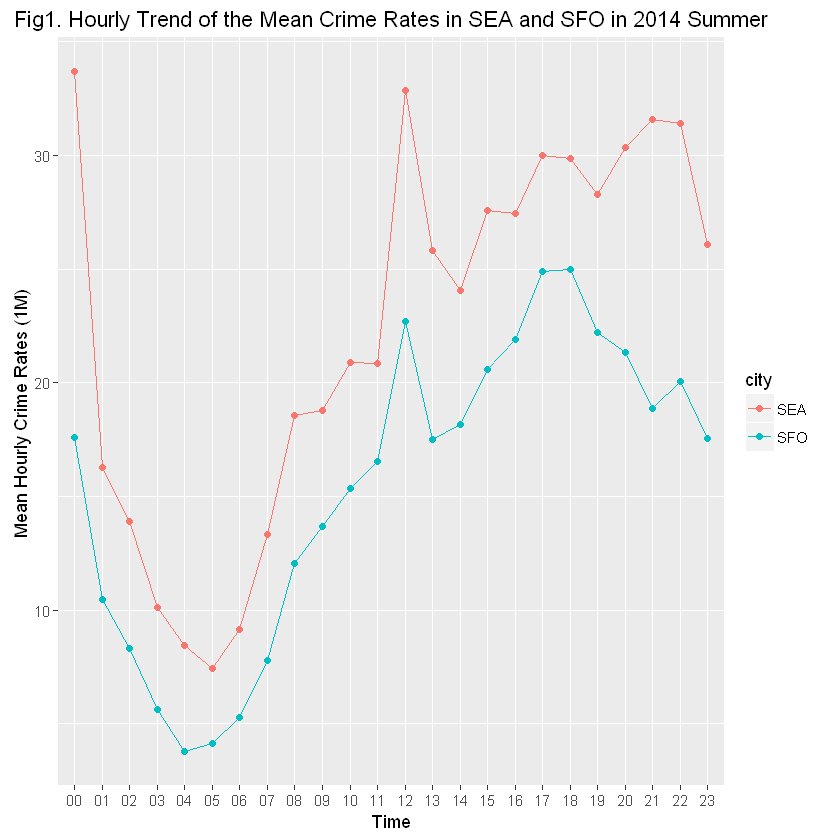

In [38]:
## Prepare data frame: mean hourly crime rate vs time
dfseaCrime2<-ddply(dfseaCrime,.(city,Time),function(x){c(MeanDailyCrimeAtGivenTime=nrow(x)/nlevels(as.factor(x$Date)))})
dfsfoCrime2<-ddply(dfsfoCrime,.(city,Time),function(x){c(MeanDailyCrimeAtGivenTime=nrow(x)/nlevels(as.factor(x$Date)))})
dfbindCrime2<-rbind(dfseaCrime2,dfsfoCrime2)

## Normalize the crime rates 
dfbindCrime2$MeanDailyCrimeAtGivenTimePerMillion<-dfbindCrime2$MeanDailyCrimeAtGivenTime
dfbindCrime2$MeanDailyCrimeAtGivenTimePerMillion[dfbindCrime2$city=="SEA"]<-dfbindCrime2$MeanDailyCrimeAtGivenTime[dfbindCrime2$city=="SEA"]/668342*10^6
dfbindCrime2$MeanDailyCrimeAtGivenTimePerMillion[dfbindCrime2$city=="SFO"]<-dfbindCrime2$MeanDailyCrimeAtGivenTime[dfbindCrime2$city=="SFO"]/852469*10^6

#plot: Mean hourly crime rates vs Time in SEA & SFO
ggplot(data=dfbindCrime2,mapping=aes(x=Time,y=MeanDailyCrimeAtGivenTimePerMillion,color=city,group=city))+geom_point()+geom_line()+labs(y="Mean Hourly Crime Rates (1M) ",title="Fig1. Hourly Trend of the Mean Crime Rates in SEA and SFO in 2014 Summer")

The red and blue curves in Fig1 are respectively the hourly trend of the mean crime rates in SEA and SFO. We can first tell that SEA has higher crime rates than SFO. Secondly, the crime rates in SEA and SFO varied similarly until after 7pm the crime rates had a peak in SEA while kept decreasing in SFO. 

We know that different crime categories may have different dependences on time, for example, robberies may happen more during nights and forgery may not. Therefore, it's worth looking into the categories of the mean hourly crime rates to understand the hourly trend.

Fig2 showed in both SEA and SFO, theft is the top category and is about half of the total mean hourly crime rate. The second largest portion is a category called "OTHERS" including miscellaneous categories which are not convenient to be separated here. The third and the fourth largest categories are different in SEA and SFO. In SEA, they are respectively burglary and property; while in SFO, they are respectively warrants and drug. Fig2 implies that the mean hourly crime rates shown in Fig1 were dominated by "THEFT" and "OTHERS" in both SEA and SFO. 

Fig3 showed the hourly trend of the mean crime rates for the top four categories in SEA and SFO. The hourly trend for each category overall is similar as the corresponding mean hourly crime rates in Fig1. There are a few small differences, for example, burglary and property in SEA had slightly different hourly trends after about 7pm. But the average trend of different categories is consistent. For example, the hourly trend of "OTHERS" including miscellnaeous categories is similar as "THEFT". There is likely some non-random mechanism causing the consistent hourly trend. 


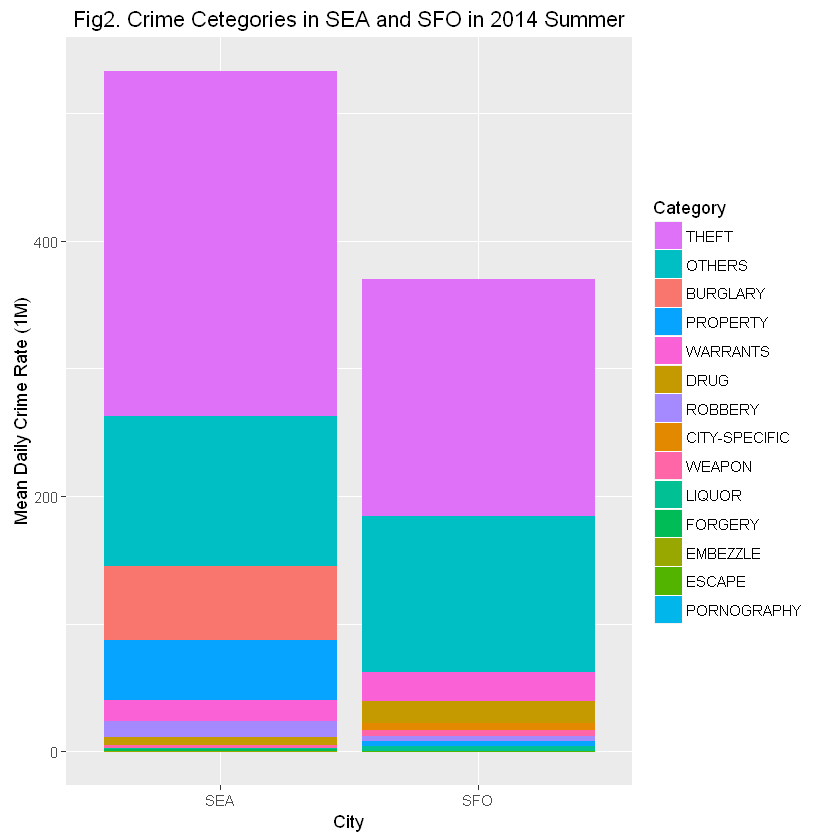

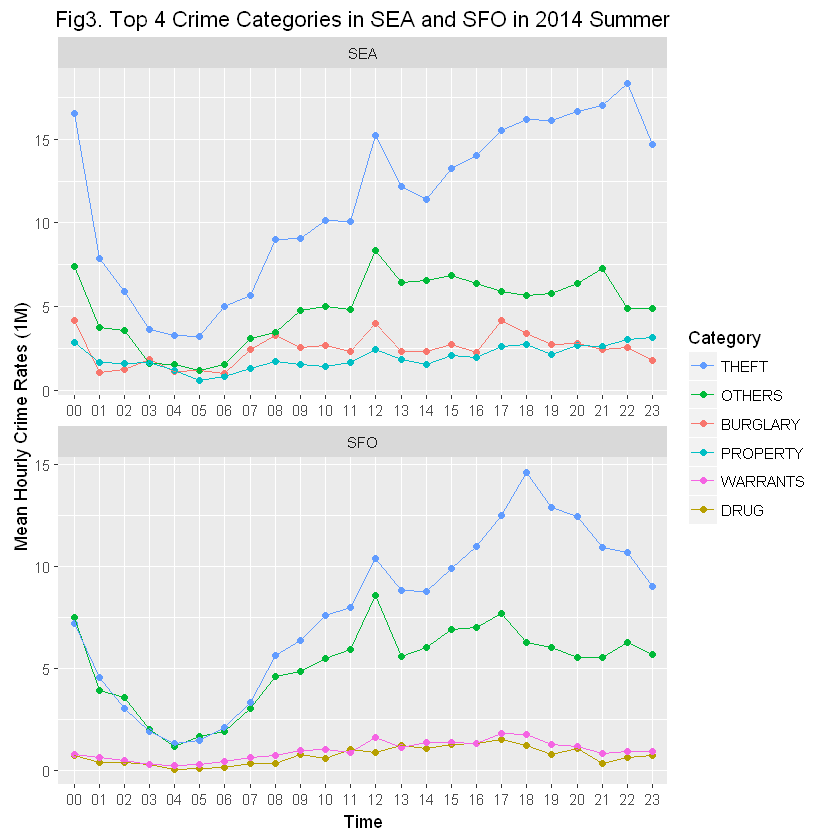

In [39]:
## prepare the SEA and SFO data so they have the same schema for the crime categories
dfsea<-merge(dfseaCrime,dfseaTemp,by=c("city","Date","Time"),suffix=c(".crime",".temp"),all.x = TRUE)
dfsfo<-merge(dfsfoCrime,dfsfoTemp,by=c("city","Date","Time"),all.x=TRUE,suffixes=c(".crime",".temp"))

dfseaCrime3<-subset(dfseaCrime,select = c("city","Date","Time","DayofWeek","month","DayofMonth","Category","Descript"))

dfsfoCrime3<-subset(dfsfoCrime,select = c("city","Date","Time","DayofWeek","month","DayofMonth","Category","Descript"))


dfbind3<-rbind(dfseaCrime3,dfsfoCrime3)

dfbind3<-na.omit(dfbind3)
dfbind3$shortCategory<-dfbind3$Category


dfbind3$shortCategory[dfbind3$Category %in% c("VEHICLE THEFT","THEFT OF SERVICES","STOLEN PROPERTY","SHOPLIFTING","MAIL THEFT","LOST PROPERTY","LARCENY/THEFT","BIKE THEFT","PICKPOCKET","OTHER PROPERTY","CAR PROWL","NON-CRIMINAL","PURSE SNATCH")]<-"THEFT"

dfbind3$shortCategory[dfbind3$Category %in% c("BURGLARY-SECURE PARKING-RES","BURGLARY")]<-"BURGLARY"

dfbind3$shortCategory[dfbind3$Category %in% c("LIQUOR VIOLATION","LIQUOR LAWS","DUI","DRUNKENNESS","DRIVING UNDER THE INFLUENCE")]<-"LIQUOR"

dfbind3$shortCategory[dfbind3$Category %in% c("ROBBERY")]<-"ROBBERY"

dfbind3$shortCategory[dfbind3$Category %in% c("DRUG/NARCOTIC","NARCOTICS")]<-"DRUG"

dfbind3$shortCategory[dfbind3$Category %in% c("[INC - CASE DC USE ONLY]","SECONDARY CODES")]<-"CITY-SPECIFIC"

dfbind3$shortCategory[dfbind3$Category %in% c("EMBEZZLE","EMBEZZLEMENT")]<-"EMBEZZLE"

dfbind3$shortCategory[dfbind3$Category %in% c("ESCAPE","RUNAWAY","ELUDING")]<-"ESCAPE"


dfbind3$shortCategory[dfbind3$Category %in% c("FORGERY","FORGERY/COUNTERFEITING")]<-"FORGERY"


dfbind3$shortCategory[dfbind3$Category %in% c("PORNOGRAPHY","PORNOGRAPHY/OBSCENE MAT")]<-"PORNOGRAPHY"

dfbind3$shortCategory[dfbind3$Category %in% c("WARRANT ARREST","WARRANTS")]<-"WARRANTS"

dfbind3$shortCategory[dfbind3$Category %in% c("WEAPON","WEAPON LAWS")]<-"WEAPON"

dfbind3$shortCategory[dfbind3$Category %in% c("VANDALISM","TRESPASS","RECOVERED PROPERTY","PROPERTY DAMAGE")]<-"PROPERTY"

dfbind3$shortCategory<-ifelse(dfbind3$shortCategory %in% c("THEFT","BURGLARY","LIQUOR","ROBBERY","DRUG","CITY-SPECIFIC","EMBEZZLE","ESCAPE","FORGERY","PORNOGRAPHY","WARRANTS","WEAPON","PROPERTY"),dfbind3$shortCategory,"OTHERS")

dfbind3_sum1<-ddply(dfbind3,.(city,shortCategory),function(x){c(MeanDailyCrimeForGivenCategory=nrow(x)/nlevels(as.factor(dfbind3$Date)))})

dfbind3_sum1$MeanDailyCrimeForGivenCategoryPerCapita[dfbind3_sum1$city=="SEA"]<-dfbind3_sum1$MeanDailyCrimeForGivenCategory[dfbind3_sum1$city=="SEA"]/668342*10^6

dfbind3_sum1$MeanDailyCrimeForGivenCategoryPerCapita[dfbind3_sum1$city=="SFO"]<-dfbind3_sum1$MeanDailyCrimeForGivenCategory[dfbind3_sum1$city=="SFO"]/852469*10^6




#plot:Crime categories in SEA and SFO
ggplot(dfbind3_sum1[order(dfbind3_sum1$MeanDailyCrimeForGivenCategoryPerCapita),])+geom_bar(aes(x=city,y=MeanDailyCrimeForGivenCategoryPerCapita,color=shortCategory,fill=shortCategory),stat = "identity",position = "stack")+scale_fill_discrete(breaks=dfbind3_sum1$shortCategory[order(dfbind3_sum1$MeanDailyCrimeForGivenCategoryPerCapita,decreasing = TRUE)],name="Category")+scale_colour_discrete(breaks=dfbind3_sum1$shortCategory[order(dfbind3_sum1$MeanDailyCrimeForGivenCategoryPerCapita,decreasing = TRUE)],name="Category")+labs(x="City",y="Mean Daily Crime Rate (1M)",title="Fig2. Crime Cetegories in SEA and SFO in 2014 Summer")



dfbind3_sum2<-ddply(dfbind3,.(city,Time,shortCategory),function(x){c(MeanDailyCrimeForGivenTimeCategory=nrow(x)/nlevels(as.factor(dfbind3$Date)))})

dfbind3_sum2$MeanDailyCrimeForGivenTimeCategoryPerCapita[dfbind3_sum2$city=="SEA"]<-dfbind3_sum2$MeanDailyCrimeForGivenTimeCategory[dfbind3_sum2$city=="SEA"]/668342*10^6

dfbind3_sum2$MeanDailyCrimeForGivenTimeCategoryPerCapita[dfbind3_sum2$city=="SFO"]<-dfbind3_sum2$MeanDailyCrimeForGivenTimeCategory[dfbind3_sum2$city=="SFO"]/852469*10^6


dfbind3_sum2v2<-rbind(dfbind3_sum2[dfbind3_sum2$shortCategory %in% c("THEFT","OTHERS","BURGLARY","PROPERTY") & dfbind3_sum2$city == "SEA",],dfbind3_sum2[dfbind3_sum2$shortCategory %in% c("THEFT","OTHERS","WARRANTS","DRUG") & dfbind3_sum2$city == "SFO",])

#plot: mean hourly crime rate vs time by category in SEA and SFO
ggplot(data=dfbind3_sum2v2,mapping=aes(x=Time,y=MeanDailyCrimeForGivenTimeCategoryPerCapita,color=shortCategory,group=shortCategory))+facet_wrap(~city,nrow=2,ncol=1,scales = "free")+geom_point()+geom_line()+scale_fill_discrete(breaks=dfbind3_sum2v2$shortCategory[order(dfbind3_sum2v2$MeanDailyCrimeForGivenTimeCategoryPerCapita,decreasing = TRUE)],name="Category")+scale_colour_discrete(breaks=dfbind3_sum2v2$shortCategory[order(dfbind3_sum2v2$MeanDailyCrimeForGivenTimeCategoryPerCapita,decreasing = TRUE)],name="Category")+labs(y="Mean Hourly Crime Rates (1M)", title="Fig3. Top 4 Crime Categories in SEA and SFO in 2014 Summer")


We have learned that there seemed to be some menchanisms causing the consistent hourly trend of the crime rates in SEA and SFO. We will first try to understand the similar hourly trend in the two cities from 12am to 7pm. It is not surprising to see that the crime rates in both cities peaked at noon, dinner time (5-6pm) and midnight (12am) and dipped at very early morning before sunrise, since these times are usually related to some routine human activites. For example, at noon and dinner time, more people go to have food; while at very early morning, more people are asleep. It makes common sense that the lunch and dinner time frames have higher chances for crimes because of more human activites. Close-midnight is special. It is late and dark so fewer people are on the streets, but it is still not too late for some people to stay up. This can be a good chance for many crimes like vehicle theft, burglary, vandalism of properties and robbery. It would not sound unreasonable if we conclude that human's similar work and rest schedules caused the similar hourly trend of the mean crime rates in SEA and SFO.


To understand the different hourly trend after 7pm between SEA and SFO, we need more thoughts and work. In Fig1, after 7pm the crime rates had a peak in SEA before decreasing but kept decreasing in SFO. One speculation to explain the difference is that after 7pm people in SEA tended to stay outside longer because of the higher temperature, which gave more chances of crimes, while in SFO people tended to stay inside because of lower temperature. But can we prove this speculation? 


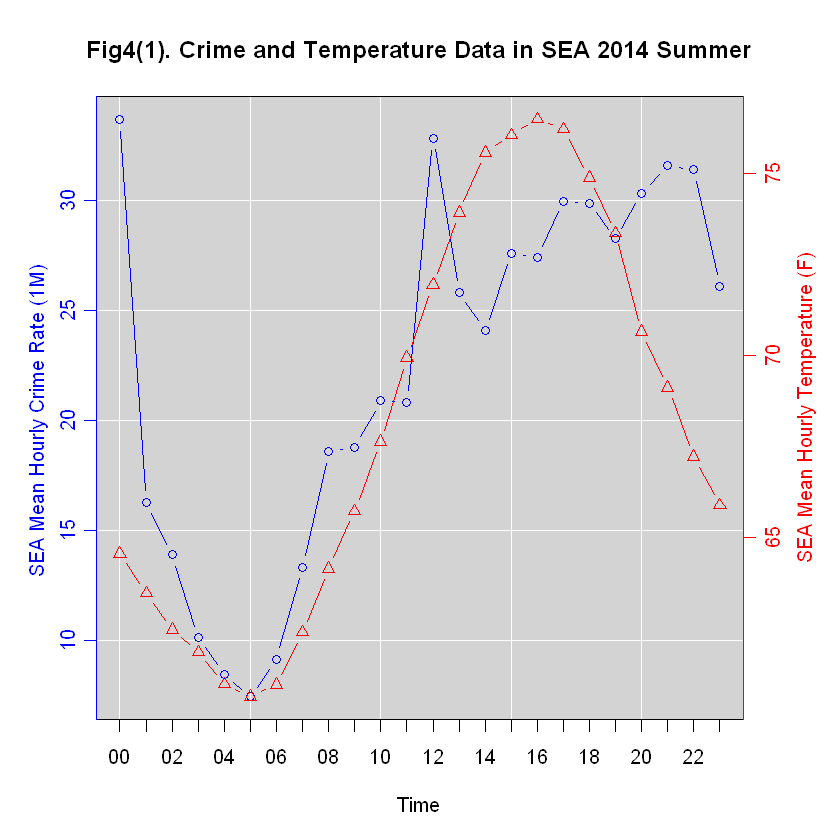

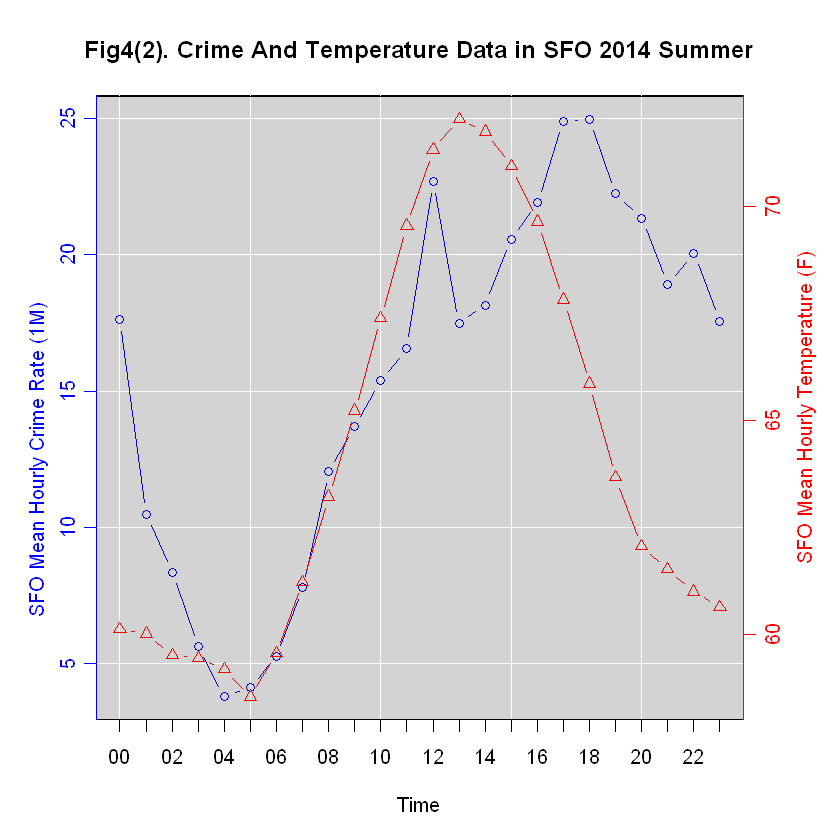

In [40]:
# correlation between hourly trend of crime rates and hourly trend of temperature

library(plotrix)

dfseaTemp2<-ddply(dfseaTemp,.(city,Time),summarise,meanTempAtGivenTime=mean(Temp_F))
dfsfoTemp2<-ddply(dfsfoTemp,.(city,Time),summarise,meanTempAtGivenTime=mean(Temp_F))
dfbindTemp2<-rbind(dfseaTemp2,dfsfoTemp2)

#plot: correlation between crime vs time and temperature vs time in SEA
lx<-dfbindCrime2$Time[dfbindCrime2$city=="SEA"]
ly<-dfbindCrime2$MeanDailyCrimeAtGivenTimePerMillion[dfbindCrime2$city=="SEA"]
rx<-dfbindTemp2$Time[dfbindTemp2$city=="SEA"]
ry<-dfbindTemp2$meanTempAtGivenTime[dfbindTemp2$city=="SEA"]

twoord.plot(lx,ly,rx,ry,xlim=range(as.numeric(lx)),xlab="Time",ylab="SEA Mean Hourly Crime Rate (1M)",rylab="SEA Mean Hourly Temperature (F)",lcol=4,main="Fig4(1). Crime and Temperature Data in SEA 2014 Summer",xtickpos = seq(0,23,by=1),xticklab = levels(as.factor(lx)), do.first="plot_bg();grid(col=\"white\",lty=1)")

#plot: correlation between crime vs time and temperature vs time in SFO
lx<-dfbindCrime2$Time[dfbindCrime2$city=="SFO"]
ly<-dfbindCrime2$MeanDailyCrimeAtGivenTimePerMillion[dfbindCrime2$city=="SFO"]
rx<-dfbindTemp2$Time[dfbindTemp2$city=="SFO"]
ry<-dfbindTemp2$meanTempAtGivenTime[dfbindTemp2$city=="SFO"]

twoord.plot(lx,ly,rx,ry,xlim=range(as.numeric(lx)),xlab="Time",ylab="SFO Mean Hourly Crime Rate (1M)",rylab="SFO Mean Hourly Temperature (F)",lcol=4,main="Fig4(2). Crime And Temperature Data in SFO 2014 Summer",xtickpos = seq(0,23,by=1),xticklab = levels(as.factor(lx)), do.first="plot_bg();grid(col=\"white\",lty=1)")

Fig4(1) and (2) shows the hourly trend correlation between the mean crime rate (indicated by the left Y scale in blue open circle) and the mean hourly temperature (indicated by the right Y scale in red open triangle). Disregard of the non-smoothiness usually inevitable from real data and the few peaks discussed above at the lunch, dinner and mid-night time frames, the mean hourly crime rates in both SEA and SFO roughly followed the trend that the temperature varied with time . Now we will focus on the time frame after 7pm when SEA and SFO showed different hourly trends in Fig1. After 7pm, the crime rate in SEA had a peak, which was different from its temperature, while the crime rate in SFO decreased similarly as its temperature. It is worth noting that from 7pm to midnight the temperature in SEA varied from 74F to 65F while the temperature in SFO was from 63F to 60F. This fact supports our speculation before that people in SEA were more likely to stay outside than those in SFO after 7pm because of much higher temperature. We assumed that high temperature may lead more people outside and thus may create more chances for crimes. Fig5 shows how the mean hourly crime rates varied with temperature.

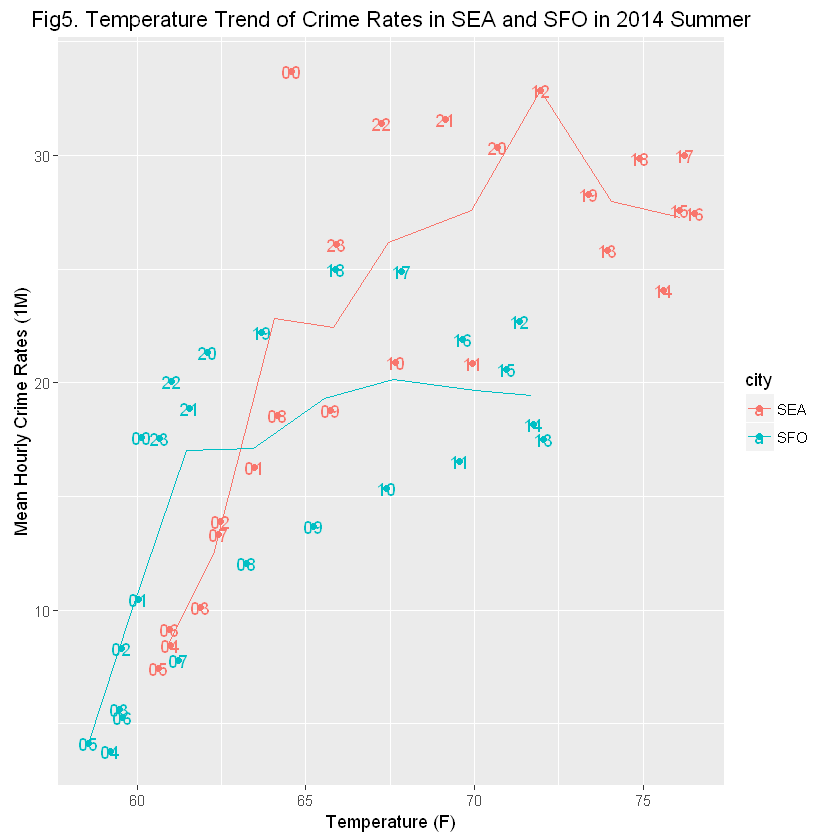

In [41]:
### Mean hourly crime rates vs Temperature
dfbind2<-merge(dfbindCrime2,dfbindTemp2,by=c("city","Time"),suffixes = c(".crime",".temp"))
dfbind2_sum<-ddply(dfbind2,.(city,round(meanTempAtGivenTime/2)),summarise,MeanTemperature=mean(meanTempAtGivenTime),MeanCrimeAtGivenTimeEachDay=mean(MeanDailyCrimeAtGivenTime),MeanCrimePerCapitaAtGivenTimeEachDay=mean(MeanDailyCrimeAtGivenTimePerMillion))
#plot: Mean hourly crime rates vs Temperature in SEA and SFO
ggplot()+geom_point(data=dfbind2,aes(x=meanTempAtGivenTime,y=MeanDailyCrimeAtGivenTimePerMillion,color=city,group=city))+geom_text(data=dfbind2,aes(x=meanTempAtGivenTime,y=MeanDailyCrimeAtGivenTimePerMillion,label=Time,color=city,group=city))+geom_line(data=dfbind2_sum,aes(x=MeanTemperature,y=MeanCrimePerCapitaAtGivenTimeEachDay,color=city,group=city))+labs(x="Temperature (F)",y="Mean Hourly Crime Rates (1M)", title="Fig5. Temperature Trend of Crime Rates in SEA and SFO in 2014 Summer")

In Fig5, the dots are the mean hourly data points and the numbers are the corresponding times of a day. The solid lines are used to better show the trend by averaging neighbouring temperature points. Fig5 shows in both SEA and SFO, the mean hourly crime rates first increased with temperature with a steep slop and then gradually flattened. The turning temperature was about 64F in SEA and was about 61F in SFO. This suggests the influence of the temperature on the crime rates is more dominating in low temperature regime than in the high temperature regime. This makes intuitive sense. As temperature is above say 65F, people do not feel chilly outside, more people tend to go/stay outside which can increase the chances of crimes. This helps to explain the different hourly trend between SEA and SFO shown in Fig1 after 7pm. In SEA, the temperature after 7pm was reletively high (the flat region in Fig5), the temperature did not have much impact on human's activity and other factors like the time dominated. In SFO, the temperature after 7pm was relatively low (close to the steep region in Fig5), the low temperature made fewer people comfortable to come out which decreased the chances of crimes.



To summarize, the hourly trends of the crime rates in SEA and SFO were compared and their similarites and differences were discussed. From 12am to about 7pm on a typical day during the summer months (June, July, August) in 2014, SEA and SFO had similar hourly trend; and after 7pm, SEA had a peak before decresing with time and SFO simply decreased. Among the many possible causes for the hourly trend discussed above, this work focused on the impact of people's work and rest schedules and the local temperatures. It was found that the human's similar work and rest schedules probably caused the similar hourly trend between SEA and SFO before 7pm; and the different local post-dinner temperatures (after 7pm) were likely to have contributed to the different hourly trends in SEA and SFO---higher temperature in SEA tended to encourage crimes and lower temperature in SFO tended to decourage crimes.    